## Linear Regression

A technique for fitting a line to data

- Widely used
- Highly interperable
- Fast
- Scalable
- Can only be used on numerical values/sets

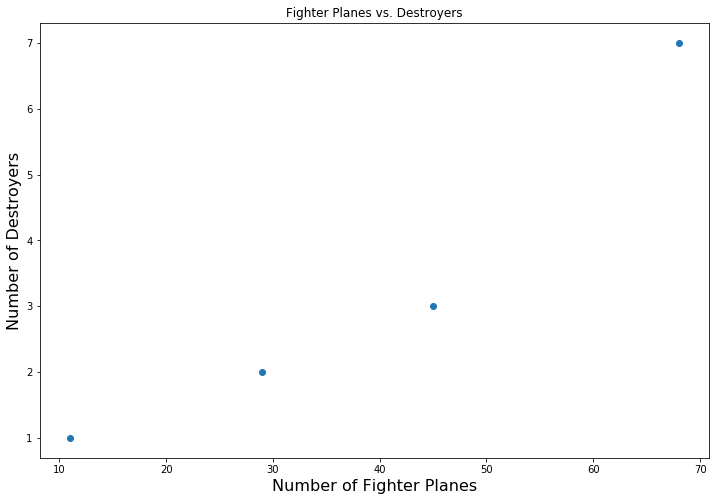

In [26]:
# As the number of fighter planes increase, the number of destroyers increases

import matplotlib.pyplot as plt

fighter_planes = [11, 45, 68, 29] 
destroyers = [1, 3, 7, 2]

plt.figure(figsize = (12,8))
plt.scatter(fighter_planes, destroyers, s = 36)
plt.xlabel('Number of Fighter Planes' , fontsize = 16)
plt.ylabel('Number of Destroyers', fontsize = 16)
plt.title('Fighter Planes vs. Destroyers', fontsize = 20)
plt.show()

Calculation for the best-fit line's slope,`m`:
![](best-fit-slope.png)

x bar is the mean of x (the number of fighter planes)<br>
y bar is the mean of y (the number of destroyers)

In [2]:
import numpy as np

x_bar = np.mean(fighter_planes)
y_bar = np.mean(destroyers)
xy_bar = np.mean(np.array(fighter_planes) * np.array(destroyers))
x_bar_squared = x_bar ** 2
x_squared_bar = np.mean(np.array(fighter_planes) * np.array(fighter_planes))

numerator = (x_bar * y_bar) - xy_bar
demoninator = x_bar_squared - x_squared_bar
m = numerator / demoninator
m #print results

0.103909026297086

Calculation for the best-fit line's y-intercept is:

![](best-fit-y-intercept.png)

In [3]:
b = y_bar - (m * x_bar)
b

-0.7245202558635393

In [4]:
# A faster way to run these equations
import statsmodels.formula.api as smf
import pandas as pd
df = pd.DataFrame({'destroyers': destroyers,
                   'fighter_planes': fighter_planes})
df

,destroyers,fighter_planes
0,1,11
1,3,45
2,7,68
3,2,29


In [6]:
# Left side is what you're trying to predict ~ what you're predicting against, specify the dataframe
lm = smf.ols(formula = 'destroyers ~ fighter_planes', data = df).fit()

In [7]:
lm.params

Intercept        -0.724520
fighter_planes    0.103909
dtype: float64

In [8]:
m, b

(0.103909026297086, -0.7245202558635393)

## y = 0.1039x - 0.7245

In [10]:
# You can manually put in the prediction value in the formula above (y = 0.1039 x 55) - 0.7245)

# Or create a dataframe that includes what you're predicting by
destroyers = pd.DataFrame({'fighter_planes': [55]})
destroyers

,fighter_planes
0,55


In [11]:
lm.predict(destroyers) #For 55 fighter planes, expect to see 4.99 destroyers

0    4.990476
dtype: float64

In [12]:
# Determine how well the model is doing:
lm.rsquared #Proportion of variance - rsquared is between 0 and 1
# 91% of the change in the y-value can be explained by the x-value

0.9151505810020466

In [16]:
# rsquared is good to be used for multiple models
# Create a new random variable below
rands = 100 * np.random.rand(len(df.index))

In [17]:
df['rands'] = rands
df

,destroyers,fighter_planes,rands
0,1,11,39.332513
1,3,45,62.939103
2,7,68,83.173829
3,2,29,8.559154


In [18]:
lm_random = smf.ols(formula='destroyers ~ rands', data = df).fit()
lm_random.rsquared

0.6050800501585218

In [19]:
lm.params

Intercept        -0.724520
fighter_planes    0.103909
dtype: float64

Equation of this model is:
## y = 0.1039x - 0.7245

For every fighter plane (x) it increases the number of destroyers<br> 
About 10 fighter planes = about 1 destroyer

In [24]:
# 10 fighter planes = .31 fighter planes
lm.params[1] * 10 + lm.params[0]

0.3145700071073214

In [25]:
# 20 fighter planes = 1.35 fighter planes
lm.params[1] * 20 + lm.params[0]

1.353660270078182

In [ ]:
#Least squares regression minimizes the distance between predicted and observed in the vertical
#y = mx + b where y = target, m = slope, b = y int